# 오버워치 2 점수판 분석 AI

In [1]:
import pandas as pd
from os import path
import joblib

players = 10


def prepare_scoreboards(defeat_, victory_):
    scoreboards_ = pd.concat([defeat_, victory_])
    scoreboards_.set_index(
        pd.Index((i, j) for i in range(len(scoreboards_.index) // players) for j in range(players)), inplace=True
    )
    return scoreboards_


datapath = path.join('datasets', '')
range_ = range(3, 10)
defeat = pd.read_csv(datapath + 'defeat.csv', usecols=range_)
victory = pd.read_csv(datapath + 'victory.csv', usecols=range_)
scoreboards = prepare_scoreboards(defeat, victory)
d_max = scoreboards['D'].max()
joblib.dump(d_max, 'max.joblib')
scoreboards.loc[
    (
            scoreboards['E'] == 0
    ) & (
            scoreboards['A'] == 0
    ) & (
            scoreboards['D'] == 0
    ) & (
            scoreboards['DMG'] == 0
    ) & (
            scoreboards['H'] == 0
    ) & (
            scoreboards['MIT'] == 0
    ), 'D'
] = d_max
scoreboards

E   A   D   DMG     H   MIT    GAME
0   0   7   3   6  5933  1068  6199  DEFEAT
    1   7   0  10  3601   747     0  DEFEAT
    2   9   1   6  4352     0     0  DEFEAT
    3   7   7   2  2332  6325     0  DEFEAT
    4   6   4   2  3410  5979   606  DEFEAT
...    ..  ..  ..   ...   ...   ...     ...
433 5   9   2  11  8880    41  8773  DEFEAT
    6  14   0   9  8737     0  1713  DEFEAT
    7   8   0  10  8410   515    50  DEFEAT
    8   8  14  10   992  8485   342  DEFEAT
    9   6  14  10  3045  6663   965  DEFEAT

[4340 rows x 7 columns]

In [2]:
scoreboards.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4340 entries, (0, 0) to (433, 9)
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   E       4340 non-null   int64 
 1   A       4340 non-null   int64 
 2   D       4340 non-null   int64 
 3   DMG     4340 non-null   int64 
 4   H       4340 non-null   int64 
 5   MIT     4340 non-null   int64 
 6   GAME    4340 non-null   object
dtypes: int64(6), object(1)
memory usage: 270.0+ KB


In [3]:
scoreboards.describe()

,E,A,D,DMG,H,MIT
count,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000
mean,13.572120,7.165438,6.357373,6150.158756,3833.787558,2346.496083
std,9.586332,8.152036,3.889305,4322.050464,5415.733377,4594.143297
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,3.000000,2701.000000,0.000000,0.000000
50%,12.000000,4.000000,6.000000,5369.000000,703.500000,326.000000
75%,20.000000,11.000000,9.000000,9030.000000,7328.000000,1901.250000
max,58.000000,54.000000,21.000000,26666.000000,130174.000000,41849.000000


In [4]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
IMAGES_PATH = path.join('.', 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('그림 저장:' + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=resolution, format=fig_extension)

In [5]:
tank = scoreboards[::players]
damage = pd.concat([scoreboards[1::players], scoreboards[2::players]])
support = pd.concat([scoreboards[3::players], scoreboards[4::players]])

그림 저장:tank_hist


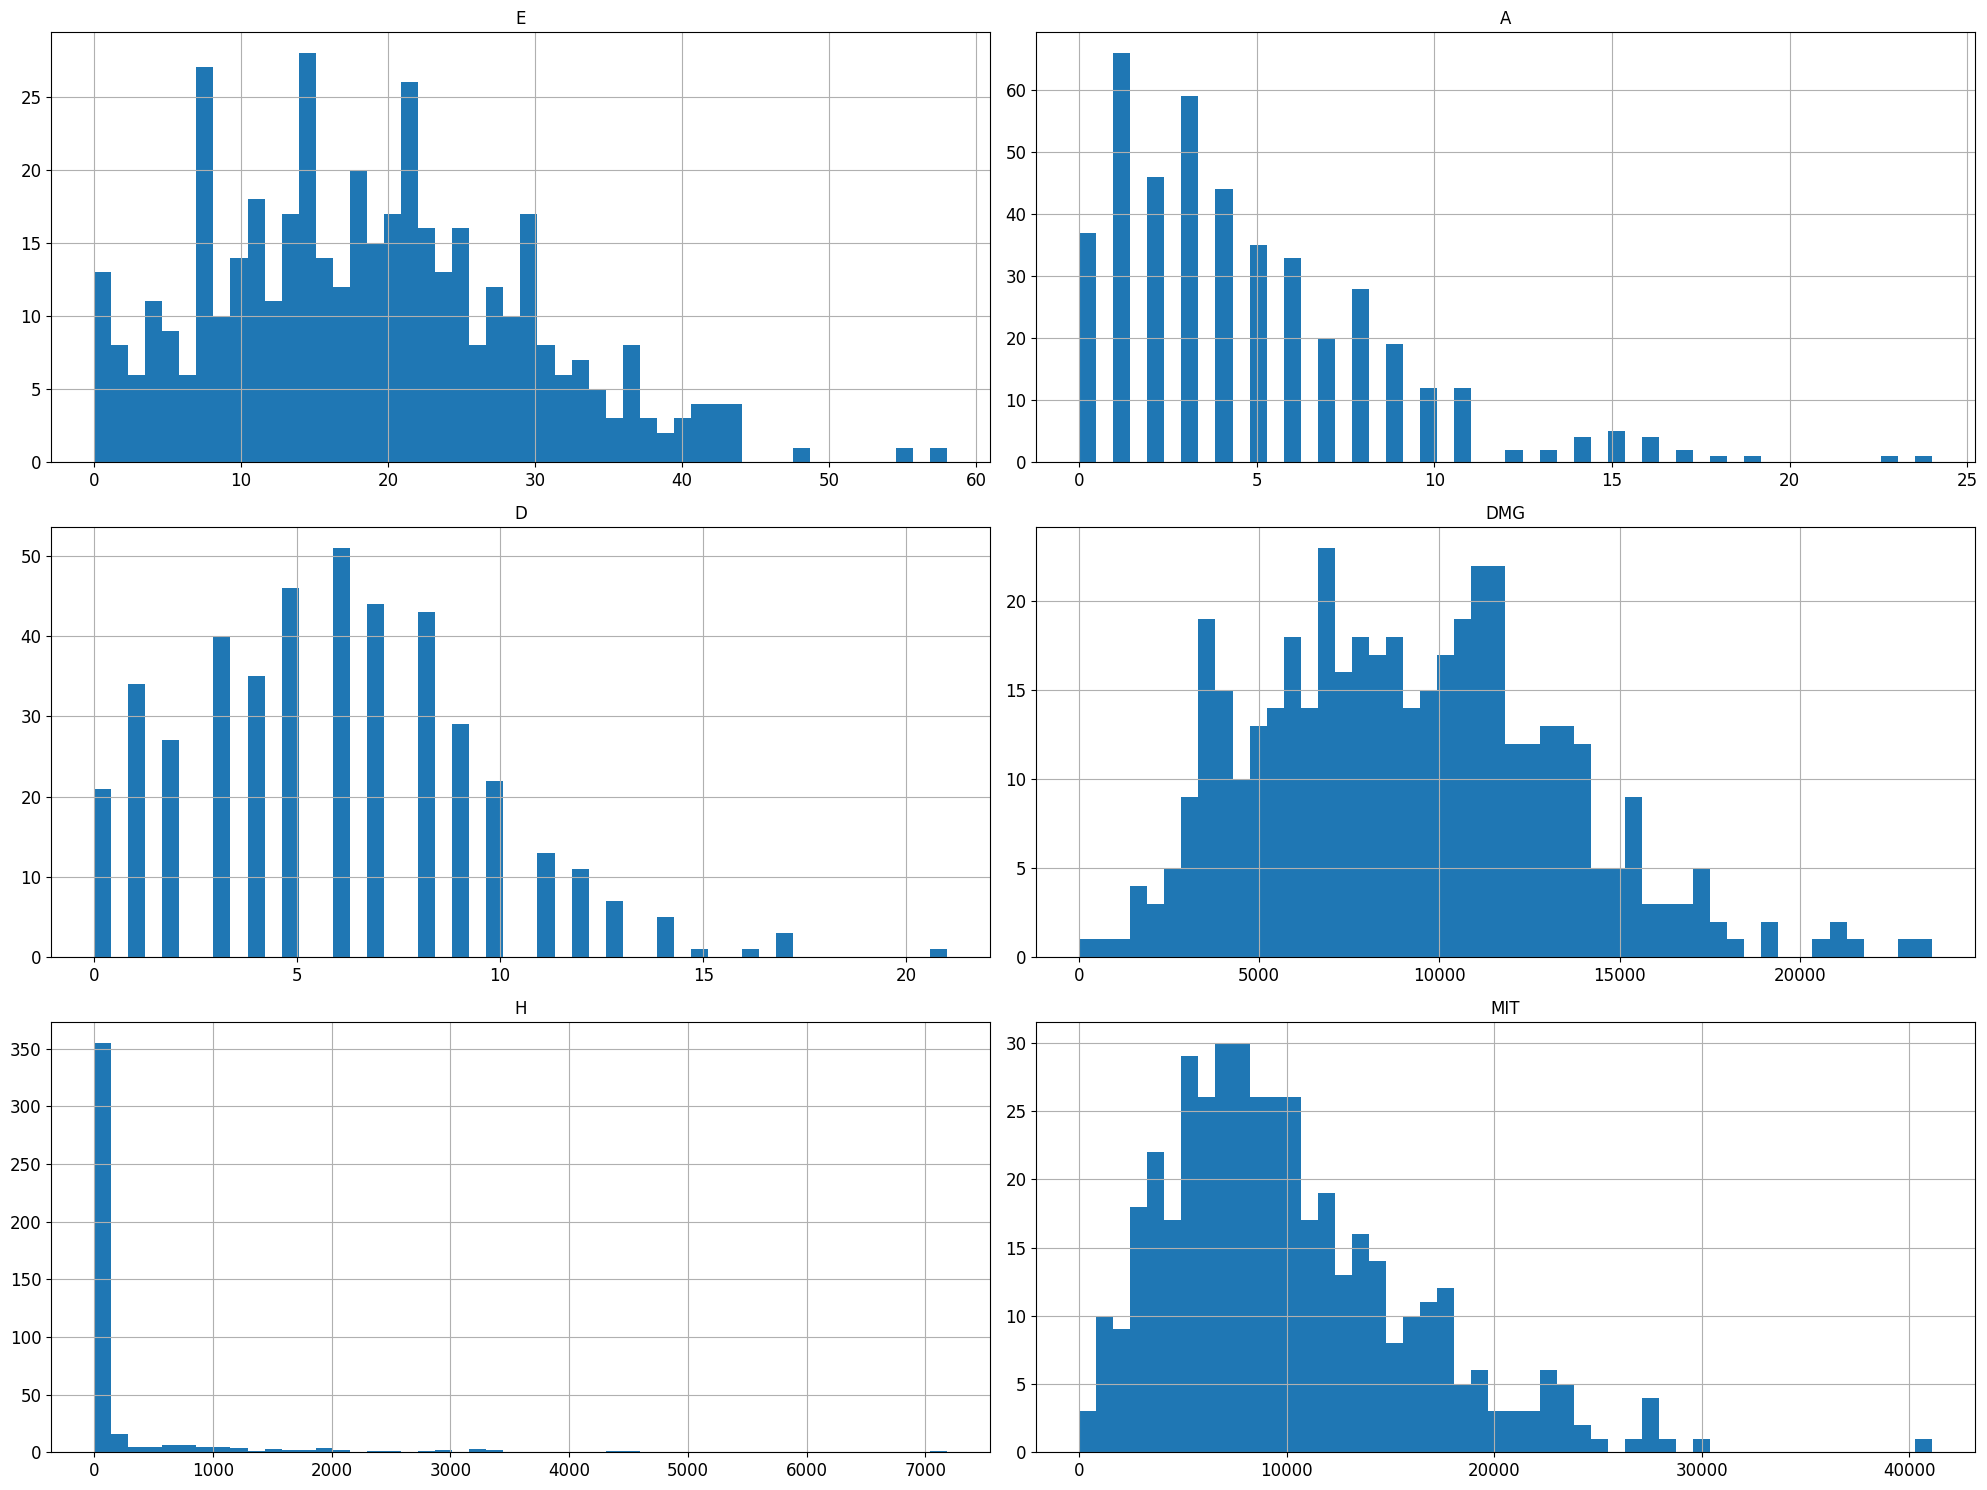

In [6]:
tank.hist(bins=50, figsize=(20, 15))
save_fig('tank_hist')
plt.show()

그림 저장:damage_hist


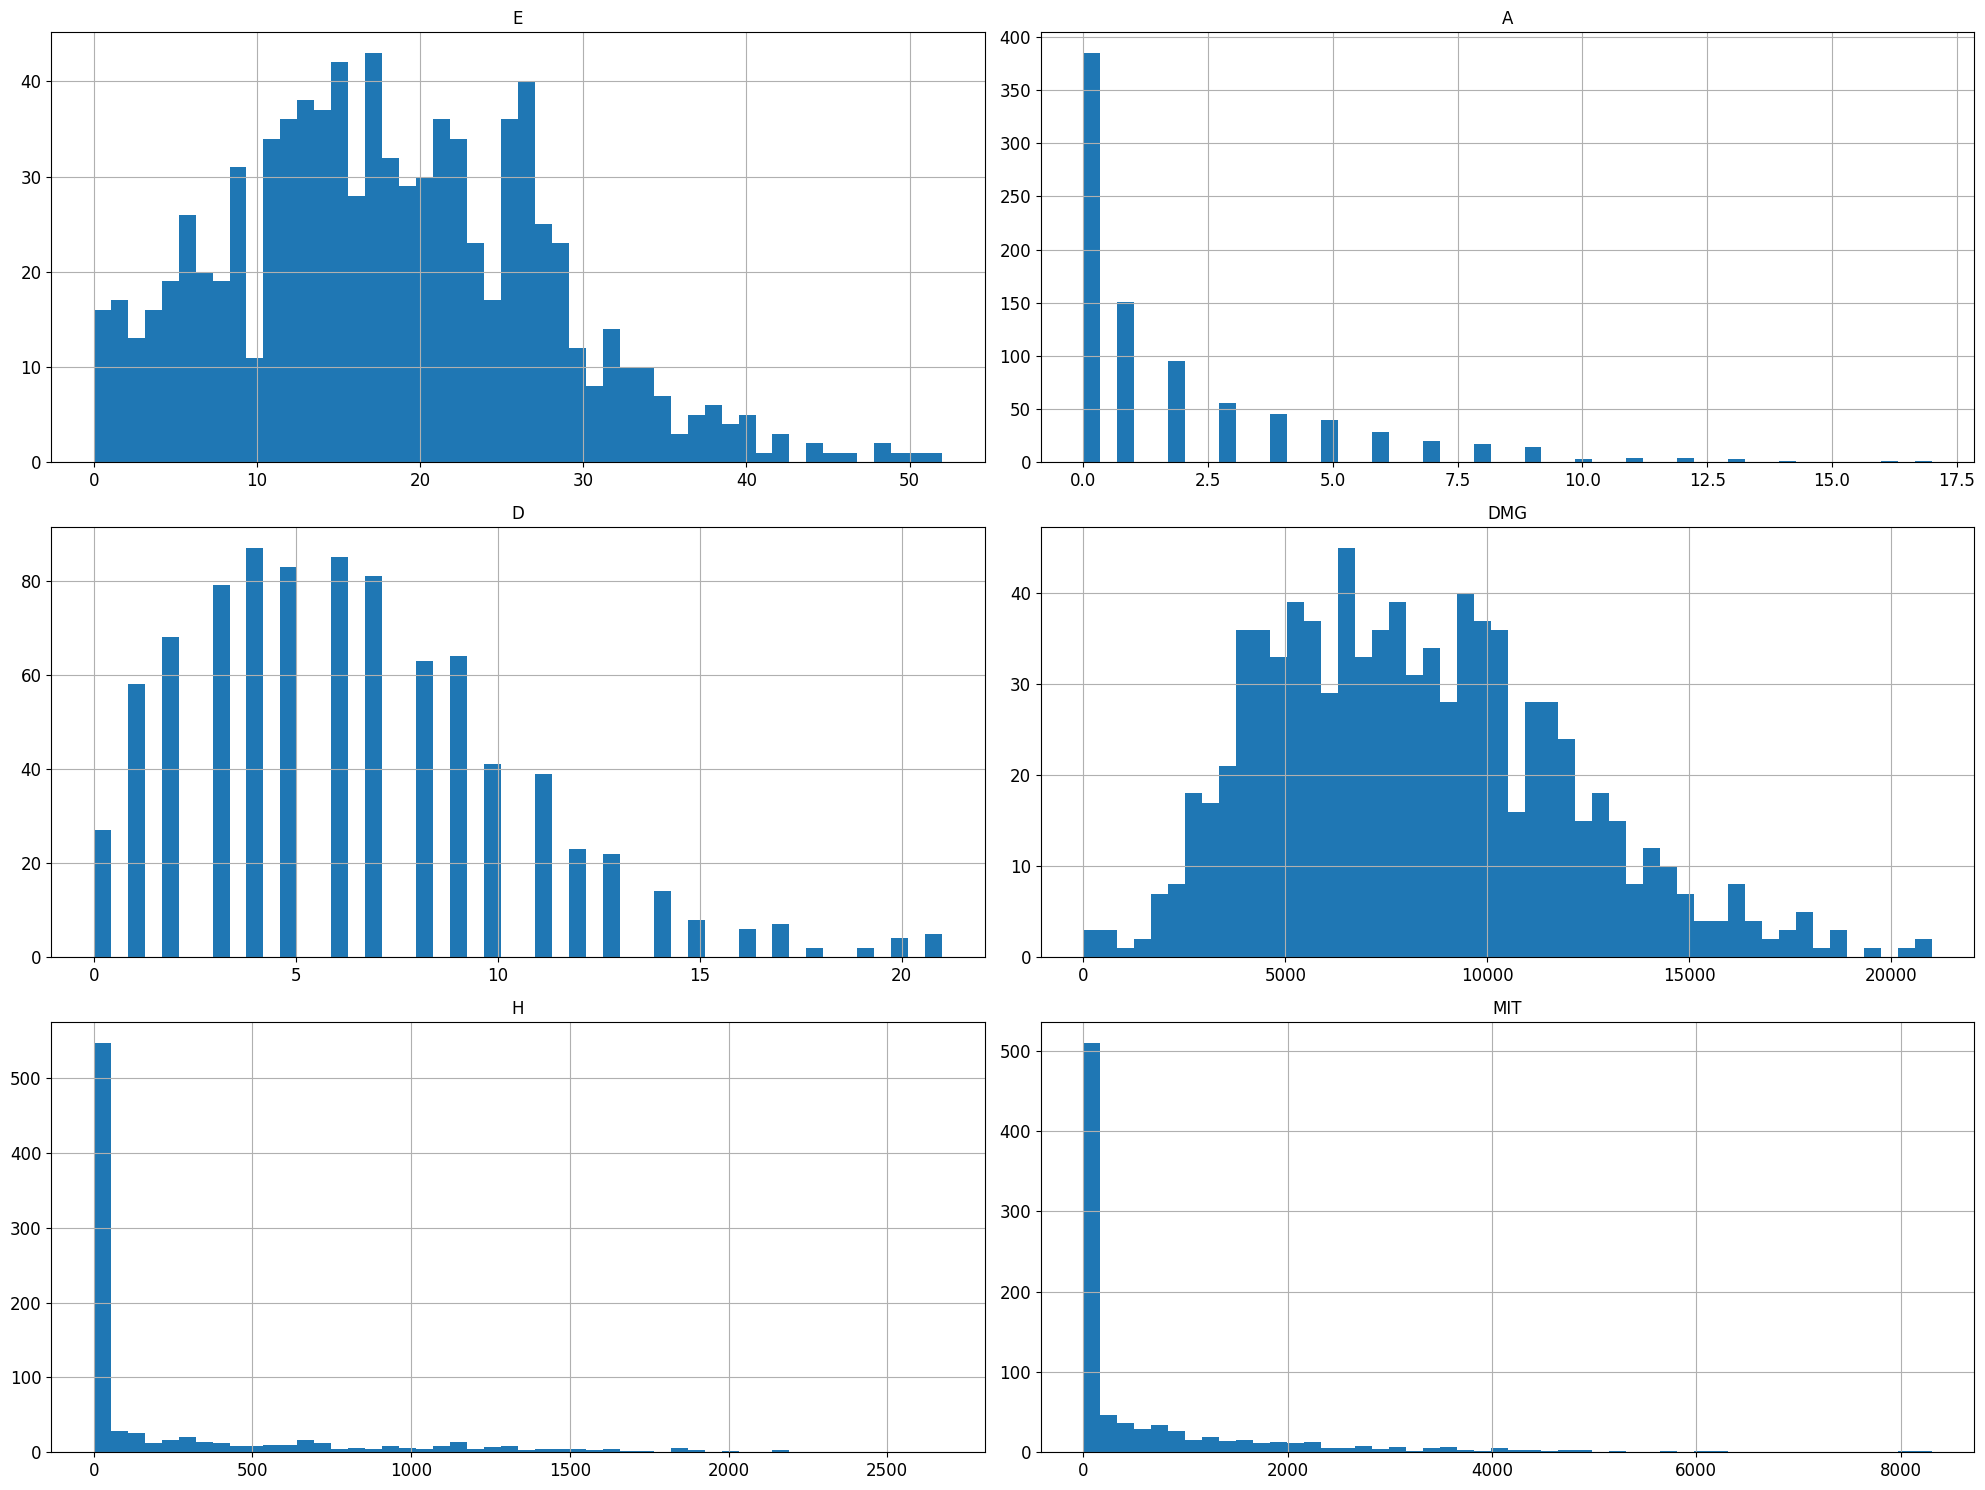

In [7]:
damage.hist(bins=50, figsize=(20, 15))
save_fig('damage_hist')
plt.show()

그림 저장:support_hist


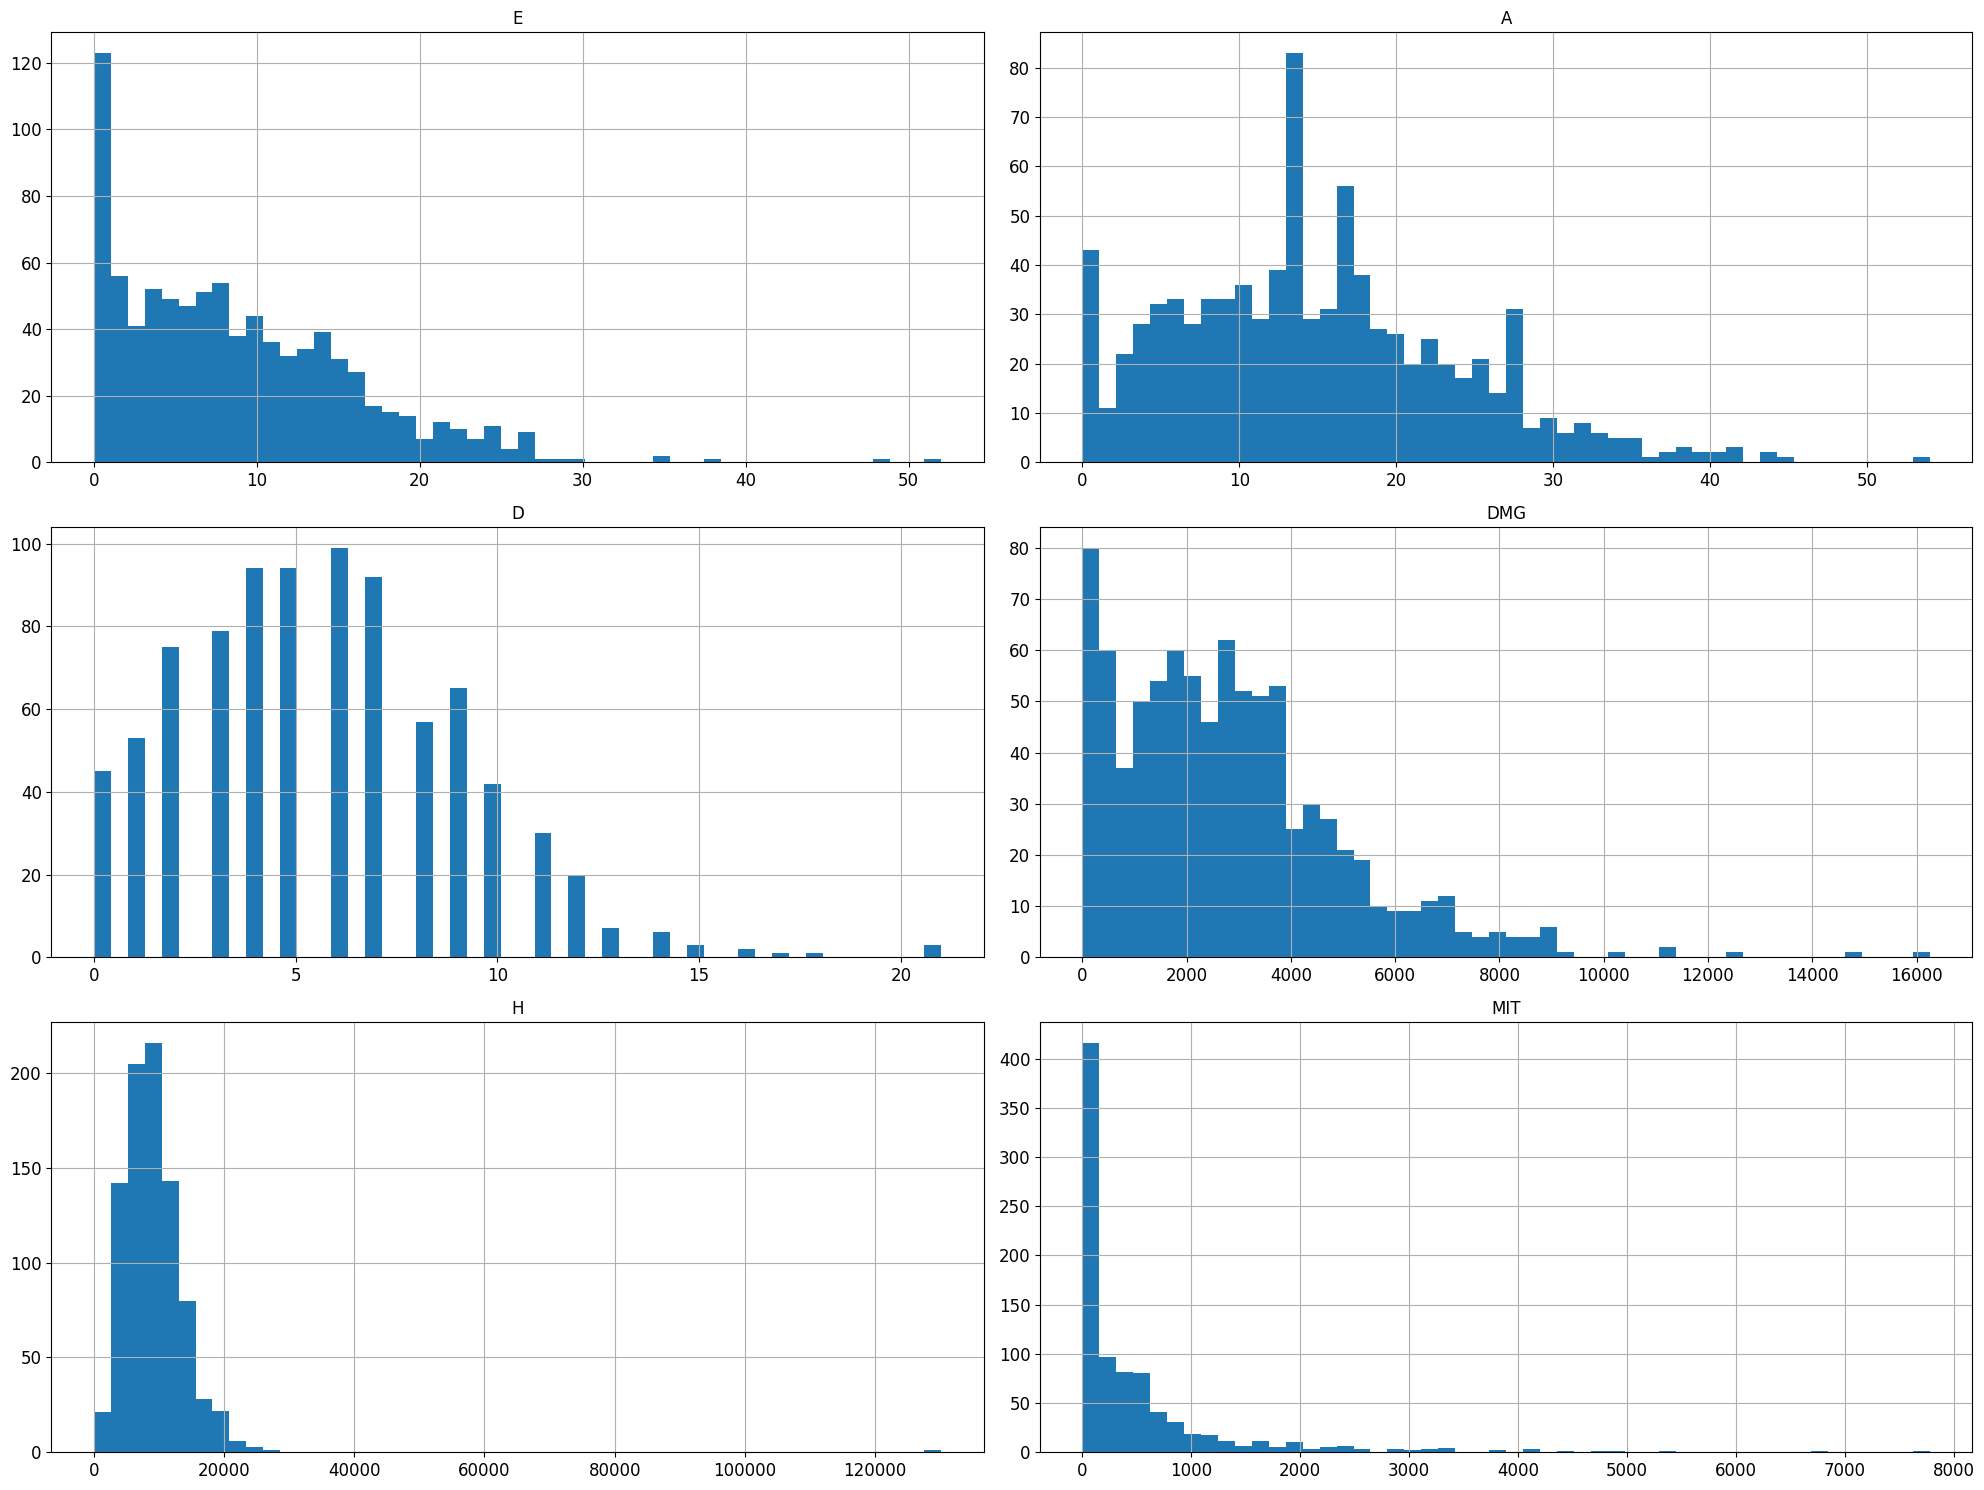

In [8]:
support.hist(bins=50, figsize=(20, 15))
save_fig('support_hist')
plt.show()

In [9]:
from sklearn import utils

scoreboards = scoreboards.loc[utils.shuffle(range(len(scoreboards.index) // players))]
scoreboards

E   A   D   DMG     H   MIT     GAME
128 0   5   0  12  4249     0  7410   DEFEAT
    1   4   1   2  3607     0   442   DEFEAT
    2   5   0   6  2686     0   987   DEFEAT
    3   0   1   7  1156  3145   132   DEFEAT
    4   4   6   6  1524  3578     0   DEFEAT
...    ..  ..  ..   ...   ...   ...      ...
84  5  14   3   6  6527     0  9164  VICTORY
    6  17   7   4  8796   324     0  VICTORY
    7  23   0   3  7139     0     0  VICTORY
    8  15  19   3  3329  7732   931  VICTORY
    9  14  13   4  4969  6235    80  VICTORY

[4340 rows x 7 columns]

In [10]:
X = scoreboards.drop('GAME', axis=1)
y = scoreboards['GAME'][::players].copy()

In [11]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(X)
joblib.dump(scaler, 'scaler.joblib')
X = pd.DataFrame(scaler.transform(X), X.index, X.columns)
X

E         A         D       DMG         H       MIT
128 0  0.086207  0.000000  0.571429  0.159341  0.000000  0.177065
    1  0.068966  0.018519  0.095238  0.135266  0.000000  0.010562
    2  0.086207  0.000000  0.285714  0.100728  0.000000  0.023585
    3  0.000000  0.018519  0.333333  0.043351  0.024160  0.003154
    4  0.068966  0.111111  0.285714  0.057151  0.027486  0.000000
...         ...       ...       ...       ...       ...       ...
84  5  0.241379  0.055556  0.285714  0.244769  0.000000  0.218978
    6  0.293103  0.129630  0.190476  0.329858  0.002489  0.000000
    7  0.396552  0.000000  0.142857  0.267719  0.000000  0.000000
    8  0.258621  0.351852  0.142857  0.124841  0.059397  0.022247
    9  0.241379  0.240741  0.190476  0.186342  0.047897  0.001912

[4340 rows x 6 columns]

In [12]:
features = X.shape[-1]
total_features = players * features
X = X.values.reshape(-1, total_features)
print(X.shape)
print(y.shape)

(434, 60)
(434,)


In [13]:
from sklearn import model_selection, linear_model

cv_iter = 1600
model_selection.cross_val_score(linear_model.LogisticRegressionCV(max_iter=cv_iter), X, y)

array([0.90804598, 0.94252874, 0.91954023, 0.82758621, 0.89534884])

In [14]:
from sklearn import neighbors

radius = 2.
model_selection.cross_val_score(neighbors.RadiusNeighborsClassifier(radius), X, y)

array([0.52873563, 0.54022989, 0.5862069 , 0.54022989, 0.54651163])

In [15]:
from sklearn import neural_network

classifier_iter = 3200
model_selection.cross_val_score(neural_network.MLPClassifier(max_iter=classifier_iter), X, y)

array([0.89655172, 0.88505747, 0.86206897, 0.82758621, 0.90697674])

In [16]:
from sklearn import ensemble, svm, tree
import operator

estimators = (
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(n_jobs=-1),
    ensemble.ExtraTreesClassifier(n_jobs=-1),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_jobs=-1),
    ensemble.HistGradientBoostingClassifier(),
    linear_model.LogisticRegression(n_jobs=-1),
    linear_model.LogisticRegressionCV(max_iter=cv_iter, n_jobs=-1),
    linear_model.PassiveAggressiveClassifier(n_jobs=-1),
    linear_model.Perceptron(n_jobs=-1),
    linear_model.RidgeClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(n_jobs=-1),
    neighbors.KNeighborsClassifier(n_jobs=-1),
    neighbors.RadiusNeighborsClassifier(radius, n_jobs=-1),
    neighbors.NearestCentroid(),
    neural_network.MLPClassifier(max_iter=classifier_iter),
    svm.LinearSVC(dual='auto'),
    svm.NuSVC(),
    svm.SVC(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier()
)
scores = [(estimator, model_selection.cross_val_score(estimator, X, y, n_jobs=-1).mean()) for estimator in estimators]
scores.sort(key=operator.itemgetter(1), reverse=True)
scores

[(RandomForestClassifier(n_jobs=-1), 0.9077786688051322),
 (GradientBoostingClassifier(), 0.9009088479016306),
 (LogisticRegression(n_jobs=-1), 0.9009088479016306),
 (LogisticRegressionCV(max_iter=1600, n_jobs=-1), 0.8986099973269178),
 (SVC(), 0.8986099973269178),
 (NearestCentroid(), 0.8985832665062817),
 (NuSVC(), 0.8963111467522052),
 (ExtraTreesClassifier(n_jobs=-1), 0.8940122961774927),
 (HistGradientBoostingClassifier(), 0.8939855653568565),
 (RidgeClassifierCV(), 0.8917134456027801),
 (SGDClassifier(n_jobs=-1), 0.8916867147821439),
 (LinearSVC(dual='auto'), 0.8916867147821439),
 (RidgeClassifier(), 0.8894413258487036),
 (BaggingClassifier(n_jobs=-1), 0.880112269446672),
 (MLPClassifier(max_iter=3200), 0.8733226410050788),
 (KNeighborsClassifier(n_jobs=-1), 0.8732691793638064),
 (AdaBoostClassifier(), 0.8641272387062282),
 (Perceptron(n_jobs=-1), 0.8434108527131784),
 (PassiveAggressiveClassifier(n_jobs=-1), 0.8130446404704624),
 (DecisionTreeClassifier(), 0.7879711307137128),
 

In [17]:
defeats = len(defeat) // players


def find_file(index):
    index += 1
    if index <= defeats:
        return f'DEFEAT ({index})'
    else:
        index -= len(victory) // players
        return f'VICTORY ({index})'

In [18]:
for estimator, _ in scores:
    estimator = estimator.fit(X, y)
    if hasattr(estimator, 'feature_importances_'):
        print(estimator)
        importances = estimator.feature_importances_.reshape(-1, features)
        tanks, damages, supports = [0, 5], [1, 2, 6, 7], [3, 4, 8, 9]
        importances[tanks] = importances[tanks].sum(0) / 2
        importances[damages] = importances[damages].sum(0) / 4
        importances[supports] = importances[supports].sum(0) / 4
        joblib.dump(importances, 'importances.joblib')

        importances_tanks = importances[tanks].sum(0)
        importances_damages = importances[damages].sum(0) / 2
        importances_supports = importances[supports].sum(0) / 2

        titles = '처치', '도움', '죽음', '피해', '치유', '경감'

        print('\n**특성 중요도**')
        for importance, title in sorted(zip(importances.sum(0), titles), reverse=True):
            print(f'{title}: {importance * 100:.2f}%')

        print('\n**1인 돌격 특성 중요도**')
        for importance, title in sorted(zip(importances_tanks, titles), reverse=True):
            print(f'{title}: {importance * 100:.2f}%')

        print('\n**1인 공격 특성 중요도**')
        for importance, title in sorted(zip(importances_damages, titles), reverse=True):
            print(f'{title}: {importance * 100:.2f}%')

        print('\n**1인 지원 특성 중요도**')
        for importance, title in sorted(zip(importances_supports, titles), reverse=True):
            print(f'{title}: {importance * 100:.2f}%')

        print('\n**1인 역할 중요도**')
        for importance, title in sorted(
                zip(
                    (importances_tanks.sum(), importances_damages.sum(), importances_supports.sum()), ('돌격', '공격', '지원')
                ),
                reverse=True
        ):
            print(f'{title}: {importance * 100:.2f}%')

        break

RandomForestClassifier(n_jobs=-1)

**특성 중요도**
처치: 33.01%
죽음: 27.08%
도움: 19.27%
피해: 9.92%
치유: 5.45%
경감: 5.27%

**1인 돌격 특성 중요도**
처치: 12.45%
죽음: 11.21%
도움: 3.71%
피해: 2.35%
경감: 1.48%
치유: 0.38%

**1인 공격 특성 중요도**
처치: 7.28%
죽음: 3.00%
피해: 2.17%
치유: 1.07%
경감: 0.79%
도움: 0.73%

**1인 지원 특성 중요도**
도움: 7.05%
죽음: 4.94%
처치: 3.00%
피해: 1.61%
치유: 1.46%
경감: 1.11%

**1인 역할 중요도**
돌격: 31.57%
지원: 19.17%
공격: 15.04%


In [19]:
defeats = defeat.index.stop
for i in range(defeats - 10, defeats - 101, -10):
    defeat_i = defeat[i:i + 10]
    print(f'DEFEAT ({i // 10 + 1})')
    print(defeat_i)
    
    contributions = scaler.transform(defeat_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions *= importances
    contributions = contributions.sum(1)
    contributions[tanks] *= 2 / contributions[tanks].sum()
    contributions[damages] *= 4 / contributions[damages].sum()
    contributions[supports] *= 4 / contributions[supports].sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.3f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.3f}', end='')
    print('\n')

DEFEAT (205)
       E   A   D   DMG      H   MIT     GAME
2040  13   3  10  6045      0  9182   DEFEAT
2041  17   4  11  5853     62     0   DEFEAT
2042  19   0   9  7895      0  2406   DEFEAT
2043   5  14   6  4281   6186  1159   DEFEAT
2044   4  13   0  1543  11183  1276   DEFEAT
2045  24  14   5  9133      0  6677  VICTORY
2046  20   4   6  7516      0     0  VICTORY
2047  18   2   7  5990      0   374  VICTORY
2048  15  24   5  3381   7845     0  VICTORY
2049  15  18   4  4563   7775   287  VICTORY
TEAM 1: 0.77 0.86 1.01 0.84 0.99
TEAM 2: 1.23 1.12 1.01 1.12 1.05

DEFEAT (204)
       E   A  D   DMG     H    MIT     GAME
2030  11   1  5  9273     0  10892   DEFEAT
2031  12   0  7  5668     0    859   DEFEAT
2032   6   3  6  3313   916      0   DEFEAT
2033   3   7  2  1455  8669    203   DEFEAT
2034   0  10  3    18  8710    495   DEFEAT
2035  15   2  4  9656     0   4834  VICTORY
2036  15   0  3  4710   559      0  VICTORY
2037  12   1  3  8401     0      0  VICTORY
2038   9  14  4 

In [20]:
victorys = victory.index.stop
for i in range(victorys - 10, victorys - 101, -10):
    victory_i = victory[i:i + 10]
    print(f'VICTORY ({i // 10 + 1})')
    print(victory_i)
    
    contributions = scaler.transform(victory_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions *= importances
    contributions = contributions.sum(1)
    contributions[tanks] *= 2 / contributions[tanks].sum()
    contributions[damages] *= 4 / contributions[damages].sum()
    contributions[supports] *= 4 / contributions[supports].sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.3f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.3f}', end='')
    print('\n')

VICTORY (229)
       E   A   D    DMG      H    MIT     GAME
2280  38   3   2  12497      0  19529  VICTORY
2281  17   1   7   6593      0     89  VICTORY
2282  30   2   6   9348     39   2179  VICTORY
2283  15  28   4   3500   8799    609  VICTORY
2284   0  38   0      0  13912      0  VICTORY
2285   9   2  11   8880     41   8773   DEFEAT
2286  14   0   9   8737      0   1713   DEFEAT
2287   8   0  10   8410    515     50   DEFEAT
2288   8  14  10    992   8485    342   DEFEAT
2289   6  14  10   3045   6663    965   DEFEAT
TEAM 1: 1.41 0.99 1.43 1.22 1.40
TEAM 2: 0.59 0.89 0.69 0.69 0.70

VICTORY (228)
       E   A  D   DMG     H   MIT     GAME
2270  23   3  0  5841     0  4668  VICTORY
2271  18   1  5  5657   567     0  VICTORY
2272  21   0  1  4751     0  1343  VICTORY
2273   9  12  2  2259  6976   253  VICTORY
2274   9  17  3  2552  5909   225  VICTORY
2275   6   0  6  6012     0  6207   DEFEAT
2276   4   0  7  3838     0    13   DEFEAT
2277   8   0  7  4642   588     0   DEFEAT
2

In [21]:
from tensorflow.keras import backend, layers
from tensorflow import keras

backend.clear_session()
model = keras.Sequential()
model.add(layers.Dense(300, 'relu', input_shape=(total_features,)))
model.add(layers.Dense(100, 'relu'))
model.add(layers.Dense(1, 'sigmoid'))
model.summary()

2023-11-25 10:54:04.687418: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-25 10:54:08.208627: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-25 10:54:08.454791: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-25 10:54:08.455125: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been bu

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               18300     
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 48501 (189.46 KB)
Trainable params: 48501 (189.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


r/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-25 10:54:08.679494: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-25 10:54:08.679731: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-25 10:54:08.679743: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1726] Could not identify NUMA node of platform GPU id 0, defaulting to 0.  Your kernel may not have been built with NUMA support.
2023-11-25 10:54:08.679950: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to r

In [22]:
from tensorflow.keras import optimizers, callbacks

model.compile('sgd', 'binary_crossentropy', ['accuracy'])
transform = preprocessing.LabelEncoder().fit_transform(y)
stopping = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    X,
    transform,
    epochs=256,
    callbacks=[stopping],
    validation_split=.25
)
history.history['val_loss'][-11], history.history['val_accuracy'][-11]

Epoch 1/256


2023-11-25 10:54:09.711332: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-25 10:54:09.843213: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f1670e07a30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-25 10:54:09.843256: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2023-11-25 10:54:09.972319: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2023-11-25 10:54:10.226715: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-25 10:54:10.410851: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11/11 [==============================] - 2s 19ms/step - loss: 0.6858 - accuracy: 0.4862 - val_loss: 0.6762 - val_accuracy: 0.7706
Epoch 2/256
11/11 [==============================] - 0s 7ms/step - loss: 0.6752 - accuracy: 0.8123 - val_loss: 0.6713 - val_accuracy: 0.8532
Epoch 3/256
11/11 [==============================] - 0s 7ms/step - loss: 0.6679 - accuracy: 0.8492 - val_loss: 0.6672 - val_accuracy: 0.8073
Epoch 4/256
11/11 [==============================] - 0s 7ms/step - loss: 0.6609 - accuracy: 0.8769 - val_loss: 0.6637 - val_accuracy: 0.7890
Epoch 5/256
11/11 [==============================] - 0s 6ms/step - loss: 0.6544 - accuracy: 0.8400 - val_loss: 0.6603 - val_accuracy: 0.7431
Epoch 6/256
11/11 [==============================] - 0s 6ms/step - loss: 0.6487 - accuracy: 0.8092 - val_loss: 0.6562 - val_accuracy: 0.7615
Epoch 7/256
11/11 [==============================] - 0s 7ms/step - loss: 0.6437 - accuracy: 0.8246 - val_loss: 0.6515 - val_accuracy: 0.7982
Epoch 8/256
11/11 [=====

(0.334946870803833, 0.8990825414657593)